# What is Confusion Matrix?

Classification is a process of categorizing a given set of data into classes.
In Machine Learning(ML), you frame the problem, collect and clean the data, add some necessary feature variables(if any), train the model, measure its performance, improve it by using some cost function, and then it is ready to deploy. 
But how do we measure its performance? Is there any particular feature to look at?
A trivial and broad answer would be to compare the actual values to the predicted values. But that does not solve the issue. 
Let us consider the famous MNIST dataset and try to analyze the problem.

## Advantages of Support Vector Machine Algorithm
. Accuracy

. Works very well with limited datasets

. Kernel SVM contains a non-linear transformation function to convert the complicated non-linearly separable data into linearly separable data.
 

## Disadvantages of Support Vector Machine Algorithm
. Does not work well with larger datasets

. Sometimes, training time with SVMs can be high

## How Does the Support Vector Machine Algorithm Work?
SVM libraries are packed with some popular kernels such as Polynomial, Radial Basis Function or RBF, and Sigmoid. The classification function used in SVM in Machine Learning is SVC. The SVC function looks like this:
sklearn.SVM.SVC (C=1.0, kernel= ‘rbf’, degree=3)

### Important parameters

. C: Keeping large values of C will indicate the SVM model to choose a smaller margin hyperplane. A small value of C will indicate the SVM model to choose a larger margin hyperplane.

. kernel: It is the kernel type to be used in SVM model building. It can be ‘linear’, ‘rbf’, ‘poly’, or ‘sigmoid’. The default value of the kernel is ‘rbf’.

. degree: It’s only considered in the case of the polynomial kernel. It is the degree of the polynomial kernel function. The default value of a degree is 3.

Alright, let us dive right into the hands-on of SVM in the Python programming language.


## SVM Parameters
SVM Parameters include the values, estimators, and various constraints used to implement ML algorithms. There are three types of SV parameters in a Neural Network:

### Kernel
Kernel transforms the input data into any first as per the user requirements. The Kernels used in SVM could be linear, polynomial, radial basis functions(RBFs), and non-linear hyperplanes, created using the polynomial and RBF functions. You can obtain accurate classifiers by separating non-linear classes through an advanced kernel. 

### Regularization
The C parameters in Scikit-learn denote the error or penalty representing any miscalculation. You can maintain regularization by understanding the miscalculation and changing the decision boundary through tweaking the C parameters. 

### Gamma
Gamma parameters determine their influence over a single training example. There are two types of gamma parameters, low meaning ‘far’ and high meaning ‘close’ values. The low or far values define a Gaussian function with a large variance. Whereas, high or close values define it with small variance. 

## Applications of SVM
SVM is mainly used to classify the unseen data and have various application in different fields:

### Face Detection
Classifies the images of people’s faces in an environment from non-face by creating a square box around it. 

### Bioinformatics
The Support vector machines are used for gene classification that allows researchers to differentiate between various proteins and identify biological problems and cancer cells. 

### Text Categorization
Used in training models that are used to classify the documents into different categories based on the score, types, and other threshold values.

### Generalized Predictive Control(GPC)
Provides you control over different industrial processes with multivariable version and interactor matrix. GPC is used in various industries like cement mills, robotics, spraying, etc. 

### Handwriting Recognization
SVM is widely used to recognize handwritten characters and test them against pre-existing data. 

### Image Classification
Compared to the traditional query-based searching techniques, SVM has better accuracy when it comes to search and classifying the images based on various features.

# Building a SVM Classification Model
Problem Statement: 

Use Machine Learning to predict cases of breast cancer using patient treatment history and health data

Dataset: Breast Cancer Wisconsin (Diagnostic) Dataset

In [2]:
import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))
import pandas as pd
print('pandas version: {}'.format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt

scikit-learn version: 0.24.2
pandas version: 1.3.3


In C:\Users\chenxy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\chenxy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\chenxy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\chenxy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\chenxy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

## 加载数据


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
#data = load_breast_cancer(return_X_y=True, as_frame=True)
breast_cancer_data = load_breast_cancer()

In [5]:
print(type(breast_cancer_data))
print('Keys of breast_cancer dataset: \n{}'.format(breast_cancer_data.keys()))

<class 'sklearn.utils.Bunch'>
Keys of breast_cancer dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
#print(breast_cancer_data['DESCR'])
print(breast_cancer_data['filename'])
print(breast_cancer_data['frame'])
print(breast_cancer_data['feature_names'])
print(breast_cancer_data['target_names'])

C:\Users\chenxy\Anaconda3\lib\site-packages\sklearn\datasets\data\breast_cancer.csv
None
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [7]:
print(type(breast_cancer_data['data']))
print(breast_cancer_data['data'].shape)
print(type(breast_cancer_data['target']))
print(breast_cancer_data['target'].shape)
#print(breast_cancer_data['data'])
#print(breast_cancer_data['target'])

<class 'numpy.ndarray'>
(569, 30)
<class 'numpy.ndarray'>
(569,)


## 数据可视化exploration

首先将Numpy数组转换成Pandas DataFrame

In [8]:
#Both are OK
#breast_cancer_df = pd.DataFrame(X_train,columns=breast_cancer_data['feature_names'])
breast_cancer_df = pd.DataFrame(breast_cancer_data['data'],columns=breast_cancer_data.feature_names) 
print(type(breast_cancer_df))

<class 'pandas.core.frame.DataFrame'>


In [9]:
#print(breast_cancer_df)
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
breast_cancer_df1 = breast_cancer_df[['mean radius','mean texture','mean perimeter','mean area']]

In [11]:
breast_cancer_df1

,mean radius,mean texture,mean perimeter,mean area
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0
...,...,...,...,...
564,21.56,22.39,142.00,1479.0
565,20.13,28.25,131.20,1261.0
566,16.60,28.08,108.30,858.1
567,20.60,29.33,140.10,1265.0


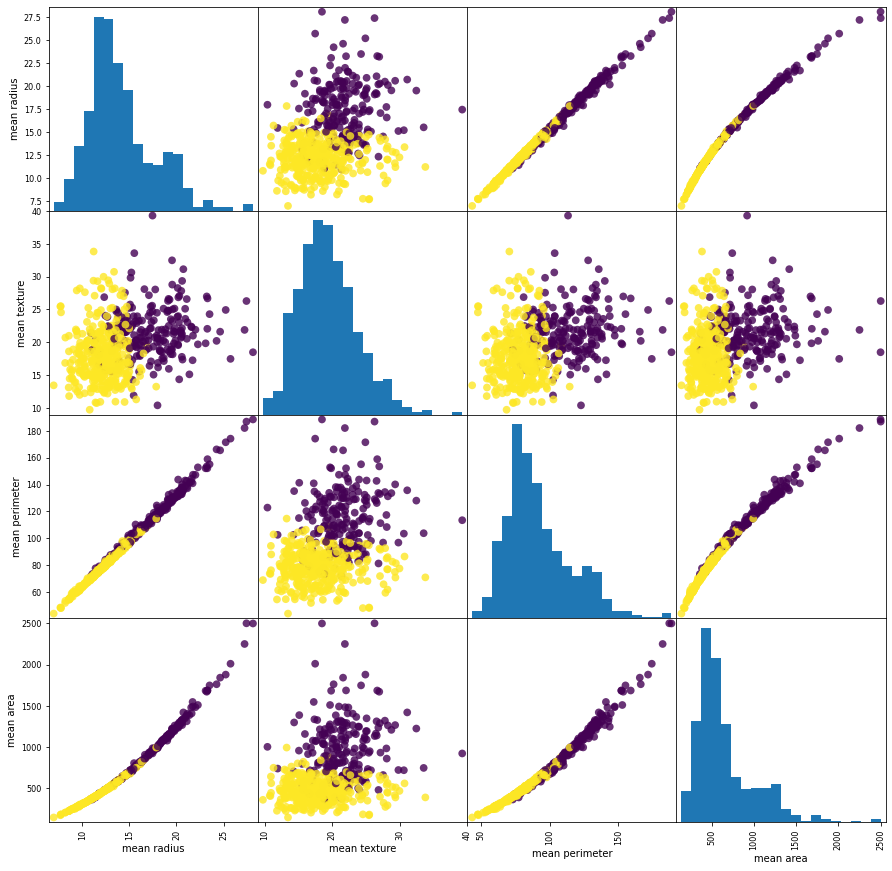

In [12]:
grr = pd.plotting.scatter_matrix(breast_cancer_df1,c=breast_cancer_data['target'],figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8)
#plt.legend()
plt.show()

## 数据集分割

In [13]:
from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test = train_test_split(breast_cancer_data['data'],breast_cancer_data['target'],test_size=0.2, random_state=42)
X_train,X_test,Y_train,Y_test = train_test_split(breast_cancer_df1,breast_cancer_data['target'],test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(455, 4) (114, 4) (455,) (114,)


## 第一个SVC模型：linear kernel

1. model实例化 Import the support vector classifier(SVC) function from Sklearn SVM module. Build the Support Vector Machine model with the help of the SVC function
2. 训练 fit()
3. 预测 predict()
4. 评估 evaluate()

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svc_clf = SVC(kernel='linear')
svc_clf.fit(X_train,Y_train)
y_pred = svc_clf.predict(X_test)
print('confusion_matrix: \n',confusion_matrix(Y_test,y_pred))
print('\nclassification_report: \n', classification_report(Y_test,y_pred))

confusion_matrix: 
 [[40  3]
 [ 5 66]]

classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



### Confusion Matrix 混淆矩阵

在机器学习领域，混淆矩阵（confusion matrix），又称为可能性表格或是错误矩阵。
它是一种特定的矩阵用来呈现算法性能的可视化效果，通常是监督学习（非监督学习，通常用匹配矩阵：matching matrix）。
其每一列代表预测值，每一行代表的是实际的类别。这个名字来源于它可以非常容易的表明多个类别是否有混淆（也就是一个class被预测成另一个class）。

### Clarification report

1. Precision
2. Recall
3. F1-score
4. Support

## 第二个SVC模型：polynomial kernel

In [15]:
svc_clf2 = SVC(kernel='poly', degree=4)
svc_clf2.fit(X_train,Y_train)

y_pred2 = svc_clf2.predict(X_test)
print(confusion_matrix(Y_test,y_pred2))
print(classification_report(Y_test,y_pred2))

[[35  8]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        43
           1       0.90      1.00      0.95        71

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



## 第三个SVC模型：Gaussian kernel

In [18]:
svc_clf3 = SVC(kernel='rbf')
svc_clf3.fit(X_train,Y_train)

y_pred3 = svc_clf3.predict(X_test)
print('Test set score: {:.2f}'.format(svc_clf3.score(X_test,Y_test)))
print(confusion_matrix(Y_test,y_pred3))
print(classification_report(Y_test,y_pred3))

Test set score: 0.92
[[34  9]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        43
           1       0.89      1.00      0.94        71

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



## 第四个SVC模型：Sigmoid Kernel

In [ ]:
svc_clf4 = SVC(kernel='sigmoid')
svc_clf4.fit(X_train,Y_train)

y_pred4 = svc_clf4.predict(X_test)
print(confusion_matrix(Y_test,y_pred4))
print(classification_report(Y_test,y_pred4))